In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
from random import randint, uniform,random

edad = ctrl.Antecedent(np.arange(18, 71, 1), 'edad')
manejo = ctrl.Antecedent(np.arange(0, 101, 1), 'manejo')
riesgo = ctrl.Consequent(np.arange(0, 101, 1), 'riesgo')

riesgo['bajo'] = fuzz.trimf(riesgo.universe, [0, 10, 20])
riesgo['medio'] = fuzz.trimf(riesgo.universe, [10, 30, 45])
riesgo['alto'] = fuzz.trimf(riesgo.universe, [40, 55, 100])

manejo['bajo'] = fuzz.trimf(manejo.universe, [0, 10, 20])
manejo['medio'] = fuzz.trimf(manejo.universe, [10, 40, 60])
manejo['alto'] = fuzz.trimf(manejo.universe, [50, 70, 100])

edad['joven'] = fuzz.trimf(edad.universe, [18, 25, 30])
edad['adulto'] = fuzz.trimf(edad.universe, [20, 35, 50])
edad['mayor'] = fuzz.trimf(edad.universe, [40, 60, 70])

c:\users\usuario\appdata\local\programs\python\python38\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


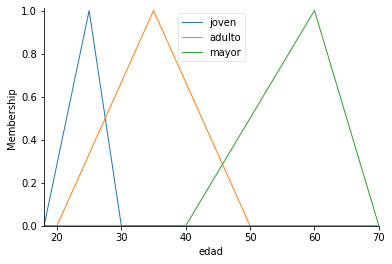

In [2]:
edad.view()

c:\users\usuario\appdata\local\programs\python\python38\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


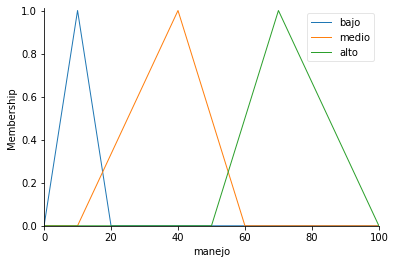

In [3]:
manejo.view()


c:\users\usuario\appdata\local\programs\python\python38\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


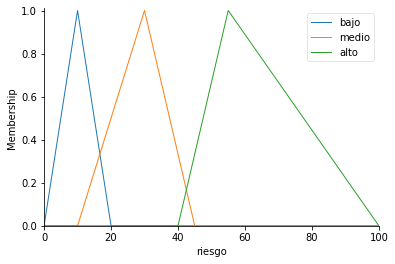

In [4]:

riesgo.view()


In [5]:
regla1 = ctrl.Rule(manejo['bajo'] and edad['joven'], riesgo['medio'])
regla2 = ctrl.Rule(manejo['medio'] and edad['joven'], riesgo['alto'])
regla3 = ctrl.Rule(manejo['alto'] and edad['joven'], riesgo['alto'])

regla4 = ctrl.Rule(manejo['bajo'] and edad['adulto'], riesgo['bajo'])
regla5 = ctrl.Rule(manejo['medio'] and edad['adulto'], riesgo['medio'])
regla6 = ctrl.Rule(manejo['alto'] and edad['adulto'], riesgo['alto'])

regla7 = ctrl.Rule(manejo['bajo'] and edad['mayor'], riesgo['medio'])
regla8 = ctrl.Rule(manejo['medio'] and edad['mayor'], riesgo['alto'])
regla9 = ctrl.Rule(manejo['alto'] and edad['mayor'], riesgo['alto'])

regla10 = ctrl.Rule(edad['joven'] and manejo['bajo'], riesgo['medio'])
regla11 = ctrl.Rule(edad['joven'] and manejo['medio'], riesgo['alto'])
regla12 = ctrl.Rule(edad['joven'] and manejo['alto'], riesgo['alto'])

regla13 = ctrl.Rule(edad['adulto'] and manejo['bajo'], riesgo['bajo'])
regla14 = ctrl.Rule(edad['adulto'] and manejo['medio'], riesgo['medio'])
regla15 = ctrl.Rule(edad['adulto'] and manejo['alto'], riesgo['alto'])

regla16 = ctrl.Rule(edad['mayor'] and manejo['bajo'], riesgo['medio'])
regla17 = ctrl.Rule(edad['mayor'] and manejo['medio'], riesgo['alto'])
regla18 = ctrl.Rule(edad['mayor'] and manejo['alto'], riesgo['alto'])

In [6]:
riesgo_ctrl = ctrl.ControlSystem([regla1,regla2,regla3,regla4,regla5,regla6,regla7,regla8,regla9
                                 ,regla10,regla11,regla12,regla13,regla14,regla15,regla16,regla17,regla18])

In [7]:
riesgos = ctrl.ControlSystemSimulation(riesgo_ctrl)

In [8]:
riesgos.input['manejo'] = 50
riesgos.input['edad'] = 27

riesgos.compute()

46.869892605851106


c:\users\usuario\appdata\local\programs\python\python38\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


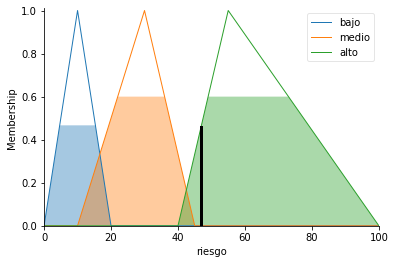

In [9]:
print (riesgos.output['riesgo'])
riesgo.view(sim=riesgos)

In [10]:
peliculas=['Avatar','The Walking Dead','Mision Imposible',
 'Dios de la Gerra','Rey Misterio',
'Rapidos y Furiosos','Godzilla',
'Godzilla vs. Kong','Fast & Furious 9',
'Fast & Furious 8','Cruella','Minions: El origen de Gru',
'The Forever Purge','Space Jam: A New Legacy','Luca',
'Jorgue El curioso','El Escuadrón Suicida','Halloween Kills',
'Misión Imposible 7','Matrix 4']

In [11]:
from neo4j import GraphDatabase

class Neo4jService(object):

    def __init__(self, uri, user, password):
        self._driver = GraphDatabase.driver(uri, auth=(user, password))

    def close(self):
        self._driver.close()
    
    def crear_nodo(self, tx, nombre,riesgo):
        tx.run("CREATE (persona:Persona {nombre: $nombre, riesgo: $riesgo})",nombre=nombre, riesgo=riesgo)
        
    def crear_pelicula(self, tx, nombre,riesgo):
        tx.run("CREATE (pelicula:Pelicula {nombre: $nombre, riesgo: $riesgo})",nombre=nombre, riesgo=riesgo)
        
    def recomendacion(self,tx):
        result = tx.run("CALL gds.beta.knn.stream('Recomendacion', {\n"
                            "topK: 1,\n"
                            "nodeWeightProperty: 'riesgo',\n"
                            "randomSeed: 42,\n"
                            "concurrency: 1,\n"
                            "sampleRate: 1.0,\n"
                            "deltaThreshold: 0.0\n"
                        "})\n"
                        "YIELD node1, node2, similarity\n"
                        "RETURN gds.util.asNode(node1).nombre AS Persona, gds.util.asNode(node2).nombre AS Pelicula, similarity")
        for record in result:
            r1=(record["Persona"])
            r2=(record["Pelicula"])
            r3=(record["similarity"])
            if r1 == nombre.get() or r2==nombre.get():
                resultado.insert(tk.END, "\n Se recomienda"+r2+" a "+r1)
                
            
    def recomendacionPer(self,tx):
        result = tx.run("CALL gds.beta.knn.stream('Recomendacion', {\n"
                            "topK: 1,\n"
                            "nodeWeightProperty: 'riesgo',\n"
                            "randomSeed: 42,\n"
                            "concurrency: 1,\n"
                            "sampleRate: 1.0,\n"
                            "deltaThreshold: 0.0\n"
                        "})\n"
                        "YIELD node1, node2, similarity\n"
                        "RETURN gds.util.asNode(node1).nombre AS Persona, gds.util.asNode(node2).nombre AS Pelicula, similarity")
        for record in result:
            r1=(record["Persona"])
            r2=(record["Pelicula"])
            r3=(record["similarity"])
            print ("El nodo "+r1+" tiene mas relacion con el nodo "+r2+" con una similitud de "+str(r3))

In [12]:
p=1
neo4j = Neo4jService('bolt://localhost:11003', 'neo4j', '12345')
with neo4j._driver.session() as session:
    for i in (np.arange(0, 100, 1)):
        nom="persona"+str(p)
        riesgos.input['edad'] = randint(18,70)
        riesgos.input['manejo'] = randint(1,100)
        riesgos.compute()
        s=float(riesgos.output['riesgo'])
        session.write_transaction(neo4j.crear_nodo , nom,s)
        p=p+1

In [13]:
neo4j = Neo4jService('bolt://localhost:11003', 'neo4j', '12345')
with neo4j._driver.session() as session:
    for i in peliculas:
        peli=i
        riesgo = float(randint(1,100))
        session.write_transaction(neo4j.crear_pelicula , peli,riesgo)

In [ ]:
from tkinter import *
from tkinter import ttk
from tkinter import messagebox
import tkinter as tk

raiz = Tk()


def clearTextInput():
    resultado.delete("1.0","end")
        
def crear():
    neo4j = Neo4jService('bolt://localhost:11003', 'neo4j', '12345')
    with neo4j._driver.session() as session:
        session.write_transaction(neo4j.crear_nodo , nombre.get(),float(dif.get()))
        
def buscar():
    neo4j = Neo4jService('bolt://localhost:11003', 'neo4j', '12345')
    with neo4j._driver.session() as session:
        session.read_transaction(neo4j.recomendacion)

def logica():
    riesgos.input['manejo'] = float(manejo.get())
    riesgos.input['edad'] = float(edad.get())
    riesgos.compute()
    dif.insert (tk.END, str(riesgos.output['riesgo']))
    print(riesgos.output['riesgo'])
    riesgo.view(sim=riesgos)


raiz.geometry('600x400')

raiz.title('ExamenFinal')


raiz.config(cursor="pencil",)
Label(raiz, text="ExamenFinal",bg="white",fg="red",font=("Arial", 18)).place(x=230, y=0)

Label(raiz, text="Nombre:",bg="lavender",font=("Arial", 12)).place(x=130, y=50)

nombre=ttk.Entry(raiz)
nombre.place(x=267, y=50)

Label(raiz, text="Edad:",bg="lavender",font=("Arial", 12)).place(x=130, y=90)

edad=ttk.Entry(raiz)
edad.place(x=267, y=90)

Label(raiz, text="Porcentaje Manejo:",bg="lavender",font=("Arial", 11)).place(x=130, y=130)

manejo=ttk.Entry(raiz)
manejo.place(x=267, y=130)

Label(raiz, text="fuzzy:",bg="misty rose",font=("Arial", 12)).place(x=260, y=370)

dif=ttk.Entry(raiz)
dif.place(x=300, y=370)


ttk.btn = Button(raiz, text="calcDif", bg="pink", fg="blue",command=logica).place(x=150, y=165)
ttk.btn = Button(raiz, text="guardar", bg="pink", fg="blue",command=crear).place(x=250, y=165)
ttk.btn = Button(raiz, text="Recomendacion", bg="pink", fg="blue",command=buscar).place(x=350, y=165)

resultado = Text(raiz,fg="purple")
resultado.place(x = 10, y=200, width=580, height=155)

raiz.mainloop()

44.88079877112139


Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\users\usuario\appdata\local\programs\python\python38\lib\tkinter\__init__.py", line 1883, in __call__
    return self.func(*args)
  File "<ipython-input-14-b14c3220e2f3>", line 28, in logica
    riesgo.view(sim=riesgos)
AttributeError: 'float' object has no attribute 'view'
